In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style='darkgrid', palette='deep')
from sklearn.preprocessing import (StandardScaler, LabelEncoder,
                                   OneHotEncoder, PolynomialFeatures)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              HistGradientBoostingClassifier, VotingClassifier,
                              StackingClassifier, AdaBoostClassifier,
                              BaggingClassifier)
import xgboost as xgb
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

path = "/content/drive/MyDrive/ML_Hillel/HW_L10_DimReduction/south+german+credit+update/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Зчитуємо датасет South German Credit:
df = pd.read_csv(path + 'SouthGermanCredit.asc', delimiter=' ', header = 0)
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


Маємо датасет з 21 колонкою (колонка kredit - таргет, визначає добрі і погані кредити), 1000 об'єктів, числові типи, без пропусків

In [ ]:
#У датасеті 700 успішних кредитів, 300 поганих кредитів
df['kredit'].value_counts()

,count
kredit,
1,700
0,300


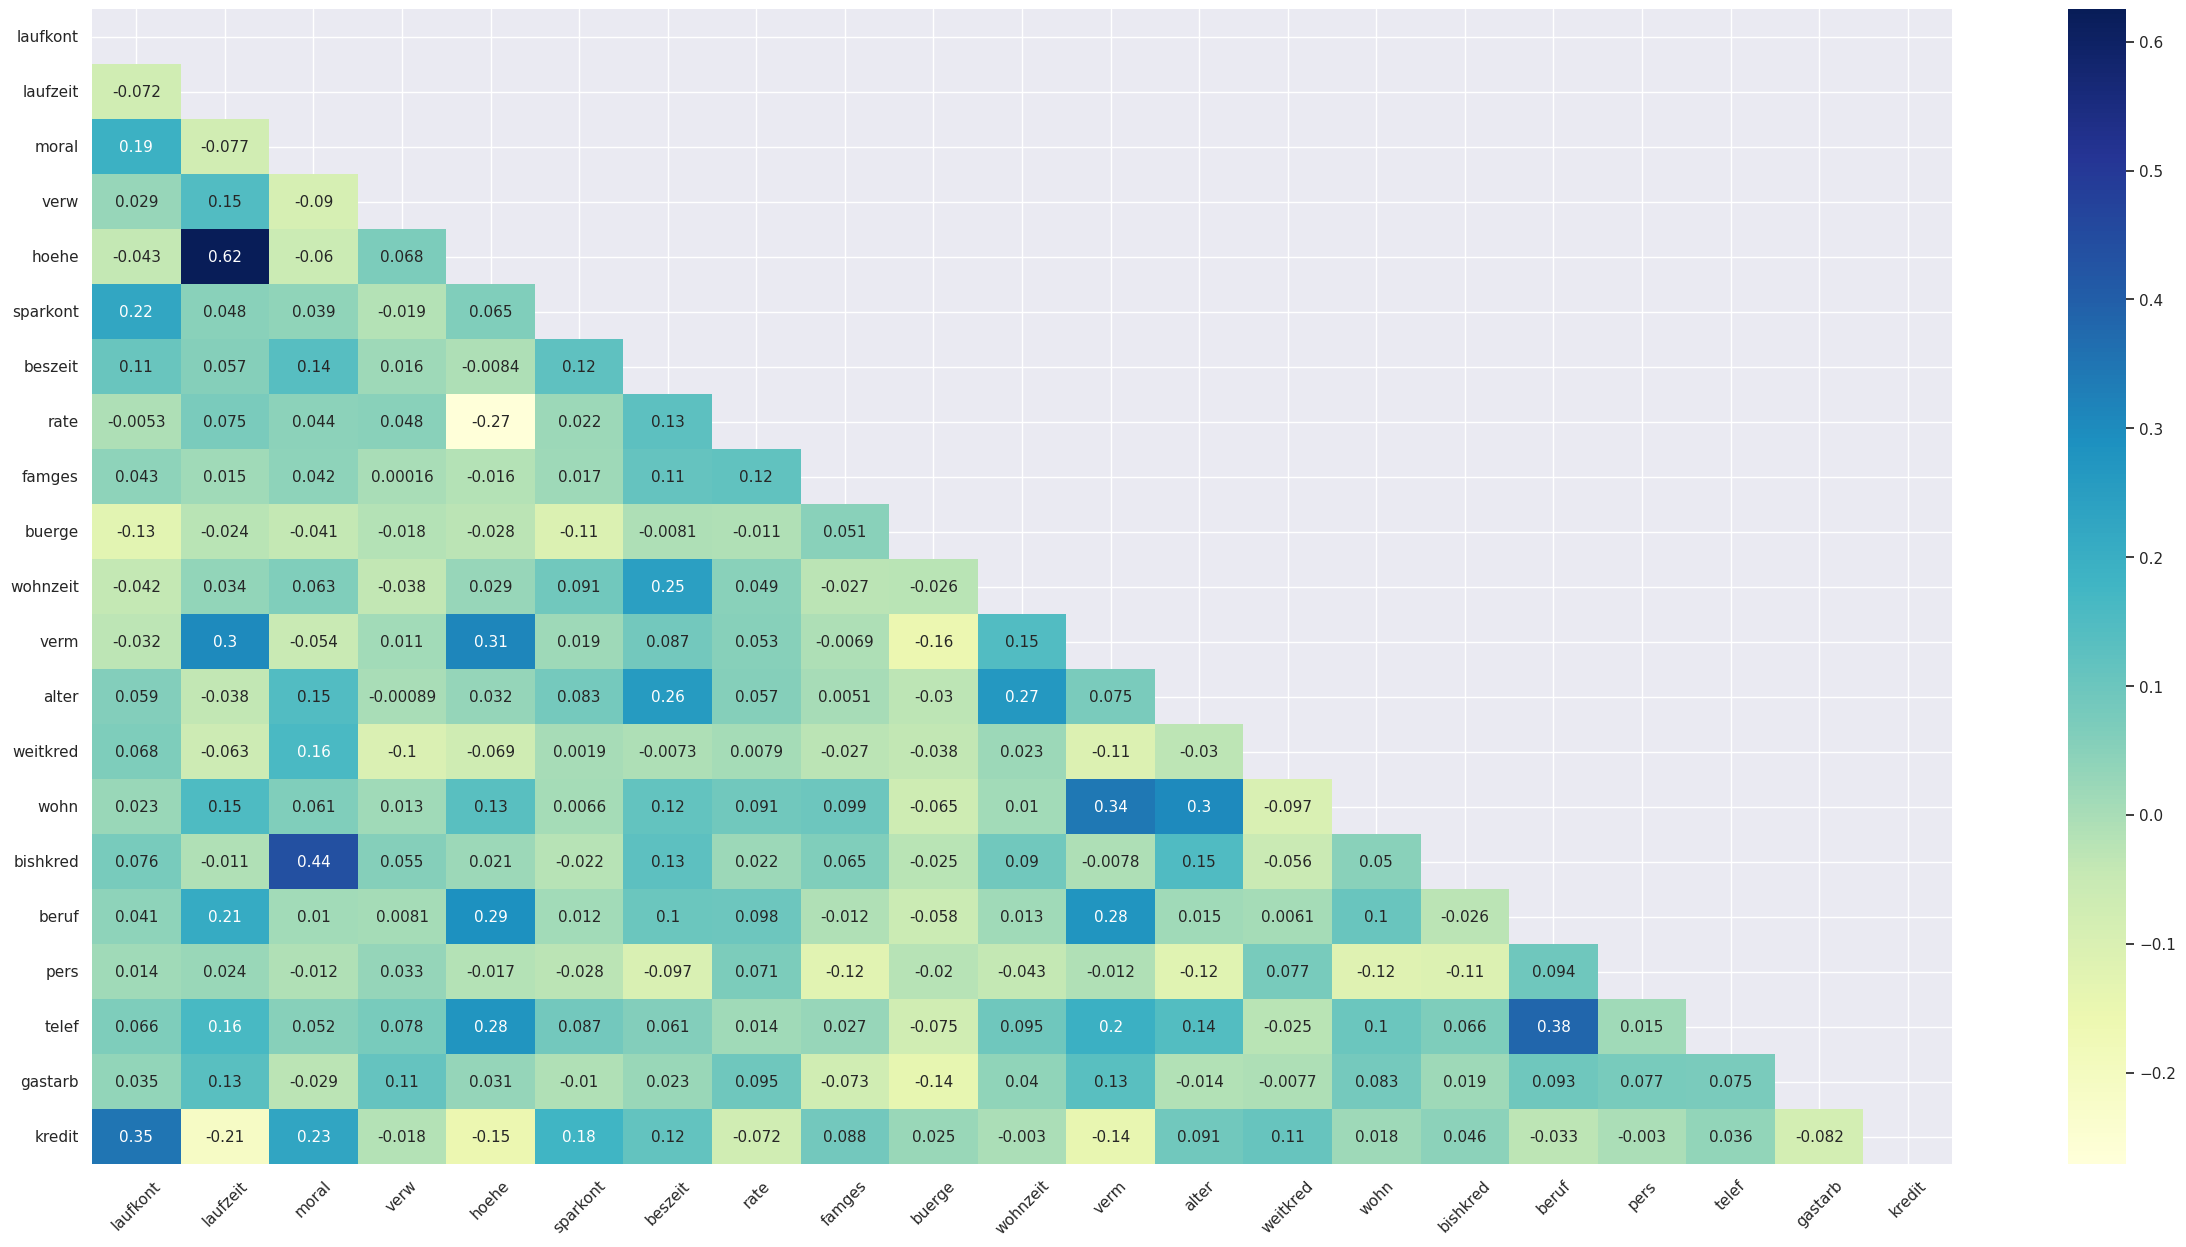

In [ ]:
# Побудуємо матрицю кореляцій для датасету за допомогою heatmap:
corr_matrix = df.corr()

plt.figure(figsize=(30, 15))

# Для зручності сприйняття створимо маску для правої верхньої частини матриці:
mask = np.triu(corr_matrix)

# Створимо теплову карту з врахуванням маски:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

Значної кореляції не спостерігається, але є  багато ознак. Тому застосуємо метод зменшення розмірності методом PCA

In [ ]:
# Спершу стандартизуємо дані (оскільки PCA чутливий до масштабу):

#Назви ознак
df_columns_scaled = list(df.columns)
df_columns_scaled.remove('kredit')

#Масштабування згідно StandardScaler
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.drop(columns='kredit')), columns = df_columns_scaled)

X = df_scaled.copy()
y = df['kredit']


# Об'єднуємо з таргетом
df_scaled = pd.concat([X, y], axis = 1)

df_scaled

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,...,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,0.428290,-0.823318,0.196014,1
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,...,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,-2.334869,-0.823318,0.196014,1
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,...,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,0.428290,-0.823318,0.196014,1
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,-2.334869,-0.823318,-5.101669,1
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,...,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,0.428290,-0.823318,-5.101669,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.254566,0.256953,-0.503428,0.062704,-0.455191,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,...,-1.293723,-1.281573,0.460831,-1.751205,-0.704926,-1.383771,-2.334869,-0.823318,0.196014,0
996,-1.254566,0.256953,-0.503428,-1.030963,-0.343187,-0.699707,1.338078,0.918477,0.449326,1.790699,...,-1.293723,0.833525,0.460831,0.135869,-0.704926,0.146949,0.428290,-0.823318,0.196014,0
997,1.132053,0.008048,1.344014,-1.030963,3.334852,1.833169,1.338078,0.918477,0.449326,-0.303686,...,1.564281,-0.488411,0.460831,2.022944,-0.704926,1.677670,0.428290,1.214598,0.196014,0
998,-0.459026,-0.738668,-0.503428,0.062704,1.133062,1.833169,-1.973997,-0.870183,0.449326,-0.303686,...,1.564281,1.450428,0.460831,0.135869,-0.704926,1.677670,0.428290,1.214598,0.196014,0


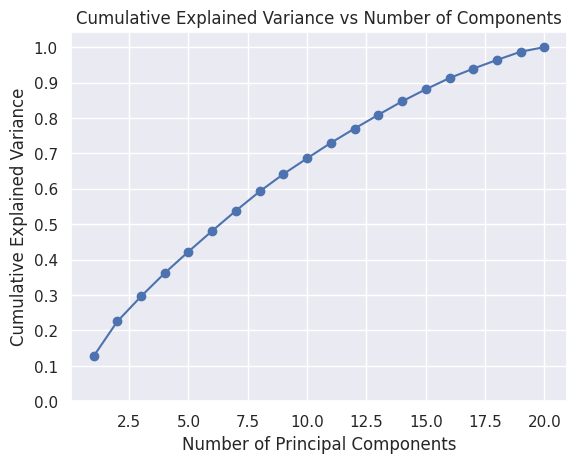

In [ ]:
# Виконуємо PCA без зазначення кількості компонент:
pca = PCA(random_state=17).fit(X)

# Обчислення накопиченої дисперсії:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Побудова графіку:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker = 'o')
#plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()

Як бачимо з графіка, якщо хочемо зберегти 70% інформації датасету, то можемо залишити 11 головних компонент (нових ознак) за методом PCA

In [ ]:
#Застосуємо метод PCA, щоб залишити 11 ознак
pca = PCA(random_state=17, n_components=11)
X_pca = pca.fit_transform(X)

# Обчислюємо сумарну частку поясненої дисперсії:
explained_variance = np.sum(pca.explained_variance_ratio_)
print('Сумарна частка поясненої дисперсії:', explained_variance)

#Частка поясненої дисперсії в розмірі головних компонент
print('Частки поясненої дисперсії в розмірі головних компонент\n', pca.explained_variance_ratio_)

#Виведемо список внесків кожної компоненти у пояснення дисперсії даних.
print('Список внесків кожної компоненти у пояснення дисперсії даних\n', pca.singular_values_)


Сумарна частка поясненої дисперсії: 0.7295964949294488
Частки поясненої дисперсії в розмірі головних компонент
 [0.12679607 0.09842891 0.07075016 0.06601061 0.06064316 0.05846197
 0.05691461 0.0544174  0.04907078 0.04447399 0.04362883]
Список внесків кожної компоненти у пояснення дисперсії даних
 [50.35793196 44.3686625  37.61652903 36.33472463 34.82618656 34.19414312
 33.738585   32.99012065 31.32755442 29.82414774 29.53940723]


Проведемо задачу класифікації методом випадкового лісу (RandomForest)

In [ ]:
# Поділ на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=17)

#Для моделювання виберемо RandomForest

# Навчання класифікатора
rf_clf = RandomForestClassifier(random_state=17)
rf_clf.fit(X_train, y_train)

#Прогноз моделі
y_pred = rf_clf.predict(X_test)

#Вивід значень оцінок моделі
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.77
Precision: 0.7735849056603774
Recall: 0.924812030075188
F1: 0.8424657534246576


Text(0.5, 32.249999999999986, 'Predicted Values')

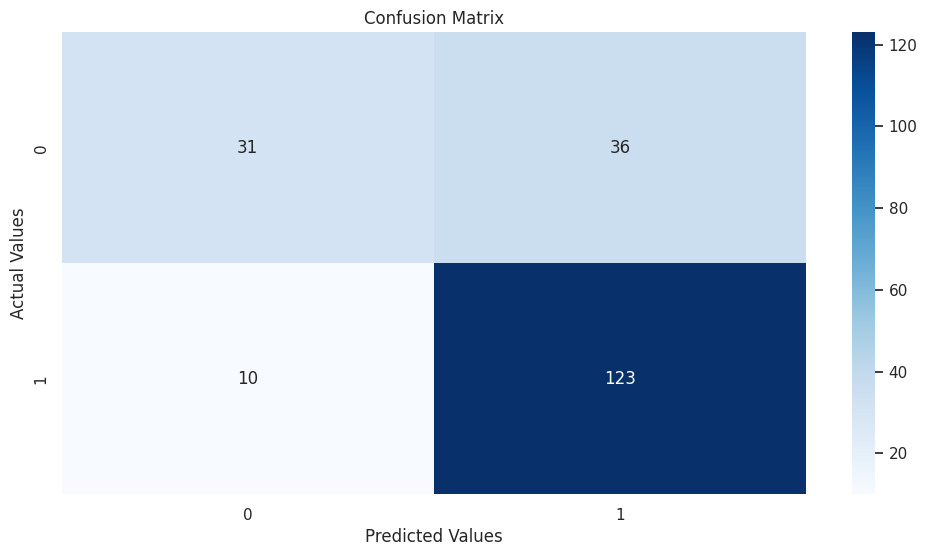

In [ ]:
#Побудуємо матрицю помилок (Confusion matrix)
cm_RF=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm_RF, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

Як бачимо, Random Forest показав високе значення Recall (більше 0,92), і є трохи гірший за показником Precision (0,77)

А тепер порівняємо з такою з моделлю на даних без скорочення розмірності простору

In [ ]:
# Поділ на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

#Для моделювання виберемо RandomForest

# Навчання класифікатора
rf_clf = RandomForestClassifier(random_state=17)
rf_clf.fit(X_train, y_train)

#Прогноз моделі
y_pred = rf_clf.predict(X_test)

#Вивід значень оцінок моделі
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.735
Precision: 0.7597402597402597
Recall: 0.8796992481203008
F1: 0.8153310104529616


Text(0.5, 32.249999999999986, 'Predicted Values')

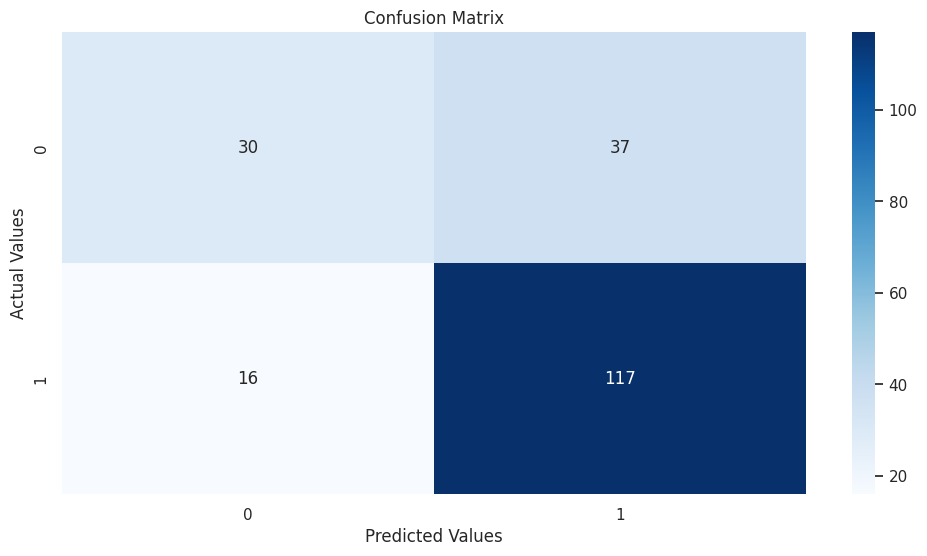

In [ ]:
#Побудуємо матрицю помилок (Confusion matrix)
cm_RF=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm_RF, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

Бачимо, що показники точності за базовими даними є гіршими.
Отже, підсумовуючи, після зменшення розмірності простору показники моделі Accuracy, Precision, Recall та F1 зросли, отже, метод PCA покращив нашу модель.

Використаємо метод KernelPCA

In [ ]:
#Ініціалізація X, y
X = df_scaled.copy()
y = df['kredit']

#Застосуємо метод KernelPCA, щоб залишити 11 ознак
kernelpca = KernelPCA(random_state=17, n_components=11, kernel='linear')
X_kernelpca = kernelpca.fit_transform(X)


In [ ]:
# Поділ на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_kernelpca, y, test_size=0.2, random_state=17)

#Для моделювання виберемо RandomForest

# Навчання класифікатора
rf_clf = RandomForestClassifier(random_state=17)
rf_clf.fit(X_train, y_train)

#Прогноз моделі
y_pred = rf_clf.predict(X_test)

#Вивід значень оцінок моделі
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.755
Precision: 0.7658227848101266
Recall: 0.9097744360902256
F1: 0.8316151202749141


Результат трохи гірший у порівнянні з скороченням простору незалежних змінних по PCA, але все одно кращий за модель без зменшення простору

Спроба реалізації через Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

#Ініціалізація X, y
X = df.drop('kredit', axis=1)
y = df['kredit']

# Поділ на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Створення пайплайну
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Стандартизація даних
    ('pca', PCA(random_state=17, n_components=11)),         # Зменшення розмірності
    ('rf_clf', RandomForestClassifier(random_state=17))   # Класифікатор
])

# Навчання моделі
pipeline.fit(X_train, y_train)

# Прогноз моделі
y_pred = pipeline.predict(X_test)

# Вивід значень оцінок моделі
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))


Accuracy: 0.715
Precision: 0.7375
Recall: 0.8872180451127819
F1: 0.8054607508532423


Через пайплайн вдалось виконати аналогічні етапи по стандартизації, зменшенню простору і класифікації, зменшивши кількість програмного коду.

На завершення переглянемо графік на основі t-SNE

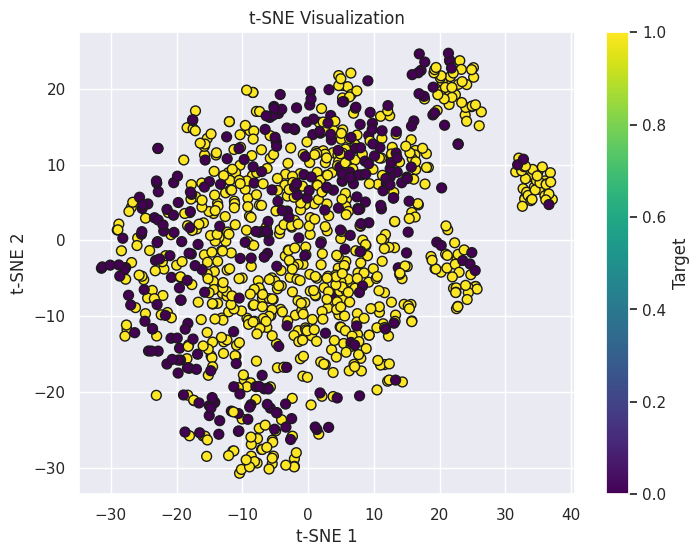

In [ ]:
#Ініціалізація X, y
X = df_scaled.copy()
y = df['kredit']

# Використовуємо t-SNE для зменшення розмірності до 2 компонент (2D)
tsne = TSNE(n_components=2, perplexity=47, random_state=17)
X_tsne = tsne.fit_transform(X)

# Створюємо графік 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Target')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization')
plt.grid(True)
plt.show()

По графіку можна сказати, що у всій вибірці виділяється 3 невеликі підгрупи і основна частина.